<h1>安定性</h1>

Pythonによる制御工学入門 P114 ~

１次、２次の遅れ系のステップ応答を調べたとき、パラメータによっては出力応答が安定することもあれば発散することもありました。このようなシステムのことを**不安定**と表現します。  

しかし、パラメータを代入していって安定するパラメータを選出したいでしょうか？そこで、システムの安定性を調べる方法を考えます。~~進化計算、強化学習で取得すれば良いでしょうとか言わない~~

<h2>入出力安定性</h2>

有界な信号を入力したとき、出力も有界になることを**入出力安定**または**BIBO安定(Bounded Input and Bounded Output Stability：有界入力、有界出力安定)**、あるいは単に**安定**と表現します。

<h3>補足　有界な信号とは？</h3>

ここでの有界な信号とは、**無限大に発散しない信号**を指し、次のように定義されます。

```math
|u(t)| \leq M < \infty,\qquad\forall t,\qquad\exist M > 0
```

１次、２次遅れ系ではパラメータによっては入出力安定ではなくなりますが、それはいつでしょうか？  
いつを調べるためには、伝達関数の**極**($P(s)=\infty$となる$s$、分母多項式の根)を調べることで確認することができます。  

Pythonの場合、伝達関数の極は```poles```関数を使うことで見ることができます。```p = poles(sys)```のように指定することで結果を得ることができます。  

In [2]:
from control.matlab import tf, tfdata

# Model is One-Order Lag systems, parameter's are K = 1, T = 1, -1.
P1 = tf([0, 1], [1, 1])
print(f'P1 : {P1.poles()}')

P2 = tf([0, 1], [1, -0.05, 1])
print(f'P2 : {P1.poles()}')

P1 : [-1.+0.j]
P2 : [-1.+0.j]


$P_1$の極は$-1$で、$P_2$の極は1になります。2次遅れ系の場合は、

In [3]:
# Second-Order Lag System's parameters are K = 1, ωn = 1, ς = 0.05, -0.05.
P3 = tf([0, 1], [1, 0.05, 1])
print(f'P3 : {P3.poles()}')

P4 = tf([0, 1], [1, -0.05, 1])
print(f'P4 : {P4.poles()}')

P3 : [-0.025+0.99968745j -0.025-0.99968745j]
P4 : [0.025+0.99968745j 0.025-0.99968745j]


で、$P_3$の極は-0.025+0.99968745jで、$P_4$は-0.025-0.99968745jになります。

ここの例だと、$P_1$と$P_3$は安定で、$P_2$と$P_4$は不安定であると言えます。  

これらを踏まえると、安定な場合は極の実部は負になり、複素平面の左半平面に極があります。反対に実部が正である場合は不安定で、極は左半平面にないことを指しています。  

なお、実部が負の極を**安定極**で、そうでない極は**不安定極**と言います。

<h3>補足　分子・分母多項式の根の算出</h3>

Pythonでは```np.roots```を使うことで分母多項式の根を求めることができます。

In [4]:
import numpy as np

[[Np], [[Dp]]] = tfdata(P4)

print(Dp)
print(np.roots(Dp))

[ 1.   -0.05  1.  ]
[0.025+0.99968745j 0.025-0.99968745j]


また、分子多項式の根($P(s) = 0$となる$s$)を**零点**と言います。しかし、零点はシステムの応答を決定しますが、システムを不安定にすることは殆どありません。

<h2>漸近安定性</h2>

伝達関数の場合は```poles```関数を使うことで安定極の判定ができました。状態空間モデルの場合は、安定性はシステムの$A$行列の固有値を調べることで確認することができます。すなわち、先ほどの安定・不安定極の議論を借りれば、状態空間モデルの場合は以下のように安定極を定義できます。  

```
システムが安定であるための必要十分条件は、行列$A$の全ての固有値の実部が負であること。
```

このような安定性を**漸近安定性**と表現します。

漸近安定性を見るためには、行列の固有値を計算する必要がありますが、Pythonでは```np.linalg.eigvals```関数を使ってみることができます。

In [5]:
A = np.array([[0, 1], [-4, -5]])
np.linalg.eigvals(A)

array([-1., -4.])

また、状態$x_1$、$x_2$の位相面図（状態$x$の軌道を$x_1 - x_2$平面にプロットしたもの）を描くことができます。

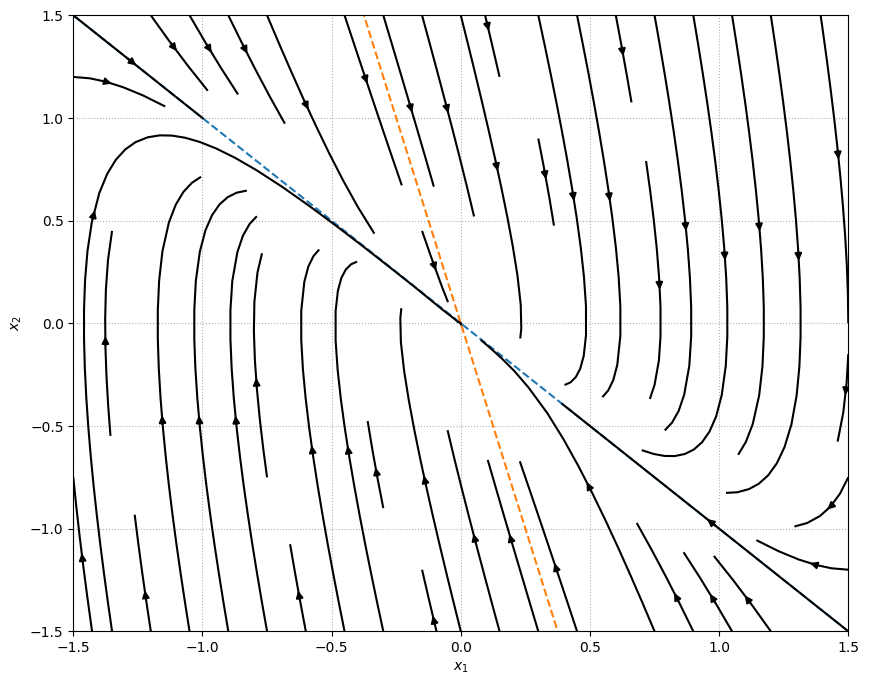

In [ ]:
import matplotlib.pyplot as plt

from plot import plot_set

w = 1.5
Y, X = np.mgrid[-w: w: 100j, -w: w: 100j]

A = np.array([[0, 1], [-4, -5]])
s, v = np.linalg.eig(A)

U = A[0, 0] * X + A[0, 1] * Y
V = A[1, 0] * X + A[1, 1] * Y

t = np.arange(-1.5, 1.5, 0.01)

fig, ax = plt.subplots(figsize=(10, 8))
if s.imag[0] == 0 and s.imag[1] == 0:
    ax.plot(t, (v[1, 0] / v[0, 0])*t, ls='--')
    ax.plot(t, (v[1, 1] / v[0, 1])*t, ls='--')

ax.set_ylim(-1.5, 1.5)
ax.streamplot(X, Y, U, V, color='k', density=0.7)
plot_set(ax, '$x_1$', '$x_2$')

破線は行列$A$の固有値に対する固有ベクトルをプロットしたもので、現在使っている固有値は$[-1, -4]$なので、それらに対応する固有ベクトルが破線で描かれています。  

また、固有ベクトルは$\dot{x} = Ax = \lambda x$を満たすものになるので、この破線、つまり固有ベクトル上に一度乗れば、その後は破線に沿って状態が遷移していきます。この破線のことを**不変空間**と呼びます。

<h2>まとめ</h2>

- 1次、2次遅れ系にパラメータを振る場合、システムの安定性を見ることで振るべきパラメータの範囲を決めることができます。
- 安定とは計算結果の虚数のうち、実部が負のものを指し、不安定とはその実部が正のものを指す。
- 伝達関数モデルの場合は、入出力安定になる伝達関数の**極**($P(s)=\infty$となる$s$、分母多項式の根)を調べることで、システムの安定性を見ることができる。Pythonでは```poles```関数を使うことで見られる。
- 状態空間モデルの場合は、行列$A$の固有値を見ることで漸近安定性を調べることができる。破線上の不変空間に沿えば状態がその線に沿い続ける状態が遷移していきます。

<h2>練習問題</h2>

$A$行列を下記のようにしたときの$A$の固有値を求めて、安定性を調べます。

```math
A = \begin{bmatrix}0 & 1 \\ -4 & 5 \end{bmatrix}
```

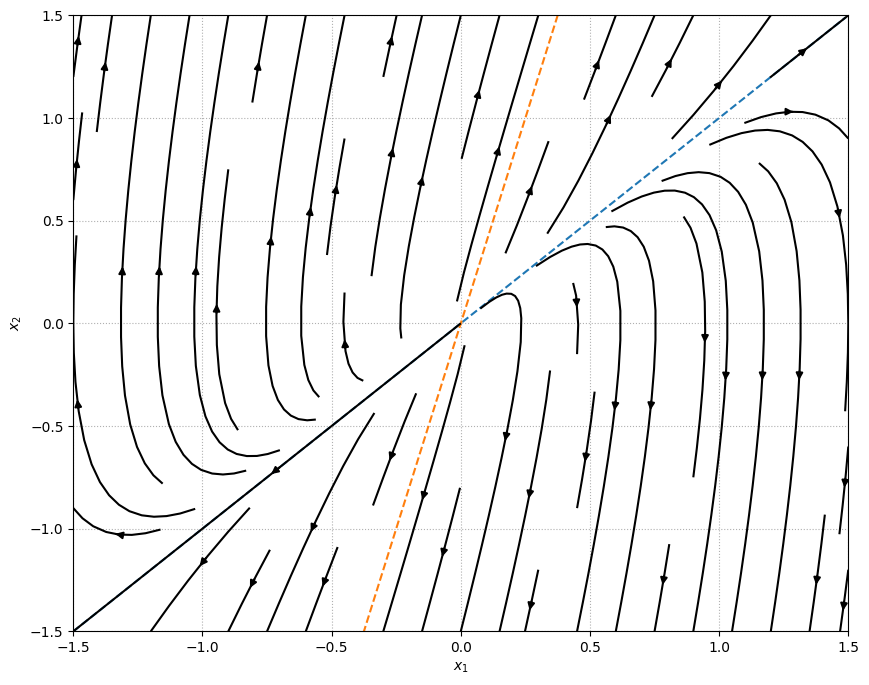

In [14]:
w = 1.5
Y, X = np.mgrid[-w: w: 100j, -w: w: 100j]

# This change values of matrix A. 
A = np.array([[0, 1], [-4, 5]])
s, v = np.linalg.eig(A)

U = A[0, 0] * X + A[0, 1] * Y
V = A[1, 0] * X + A[1, 1] * Y

t = np.arange(-1.5, 1.5, 0.01)

fig, ax = plt.subplots(figsize=(10, 8))
if s.imag[0] == 0 and s.imag[1] == 0:
    ax.plot(t, (v[1, 0] / v[0, 0])*t, ls='--')
    ax.plot(t, (v[1, 1] / v[0, 1])*t, ls='--')

ax.set_ylim(-1.5, 1.5)
ax.streamplot(X, Y, U, V, color='k', density=0.7)
plot_set(ax, '$x_1$', '$x_2$')